# Task 3. Method Chaining and Python Programs


In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_context(font_scale=1.5)
sns.set_style("darkgrid")

from scripts import project_functions 


df = project_functions.load_and_process('../data/raw/FIFA21_official_data.csv')

# Task 4: Conduct an Exploratory Data Analysis (EDA) on your dataset

This FIFA 21 data is provided by a user in kaggle who got the data from fifaindex database. In the data all the players in fifa 21 exixt with their respective stats and information. Ex(Name, age, height, nationality, position, overall, weak foot, shooting, etc..). It contains more than 10,000 rows(players) and more than 50 attributes for each player. The data was collected and updated in the date 09/10/2020. The purpose of this dataset is mainly fun and learning more of how do fifa stats work, and to find relationship between them. The data was scraped with bs4. The data falls under a "CC0: Public Domain". The data is going to be processed even further by removing variables of no interest as photos of the players and removing all players who their overall rating falls below 70. The other things that will be removed are players that are not actively playing in real life and they just classify as icons(historic players) in the fifa game.



In [2]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Age,2063.0,27.715948,4.057273,17.0,25.0,28.0,31.0,42.0
Overall,2063.0,77.931168,3.160761,75.0,75.0,77.0,79.0,93.0
WeakFoot,2063.0,3.203102,0.751300,1.0,3.0,3.0,4.0,5.0
Skill Moves,2063.0,2.899176,0.976700,1.0,2.0,3.0,4.0,5.0
JerseyNumber,2063.0,16.654387,14.980436,1.0,7.0,13.0,22.0,99.0
Crossing,2063.0,61.236549,20.304431,8.0,53.0,69.0,75.0,94.0
Finishing,2063.0,56.828405,21.564637,5.0,43.0,63.0,74.0,95.0
HeadingAccuracy,2063.0,60.363063,19.737279,7.0,53.0,65.0,75.0,93.0
ShortPassing,2063.0,70.851672,14.634085,11.0,70.0,75.0,79.0,94.0
Volleys,2063.0,54.567135,20.522686,5.0,41.0,59.0,71.0,90.0


In [3]:
df.describe(include=[object]).T

,count,unique,top,freq
Name,2063,2036,Gabriel,3
Nationality,2063,95,Spain,246
Club,2063,306,Chelsea,29
PreferredFoot,2063,2,Right,1545
Weight,2063,47,154lbs,130
BestPosition,2063,15,CB,341
GeneralPosition,2063,4,Midfielder,864


In [4]:
# Disabled Expensive Computations as there isn't enough computer power to finish them.
prof = ProfileReport(df, minimal=True)
prof

In [5]:
overallByGeneralPosition = df.groupby('GeneralPosition')['Overall'].mean().reset_index()
overallByGeneralPosition

,GeneralPosition,Overall
0,Defender,77.727564
1,Forward,78.352273
2,Goalkeeper,78.452915
3,Midfielder,77.771991


In [6]:
overallByBestPosition = df.groupby('BestPosition')['Overall'].mean().reset_index()
overallByBestPosition

,BestPosition,Overall
0,CAM,77.836879
1,CB,77.803519
2,CDM,77.658163
3,CF,78.586207
4,CM,78.239766
5,GK,78.452915
6,LB,77.842593
7,LM,77.582418
8,LW,78.852941
9,LWB,77.761905


In [7]:
top50PlayersClubNatOve = df.groupby(['Club','Name','Nationality'])['Overall'].max().reset_index()
top50PlayersClubNatOve = top50PlayersClubNatOve.sort_values(['Overall'],ascending=False)
top50PlayersClubNatOve = top50PlayersClubNatOve.head(50).reset_index(drop=True)
top50PlayersClubNatOve

,Club,Name,Nationality,Overall
0,FC Barcelona,L. Messi,Argentina,93
1,Juventus,Cristiano Ronaldo,Portugal,92
2,Atlético Madrid,J. Oblak,Slovenia,91
3,Paris Saint-Germain,Neymar Jr,Brazil,91
4,Manchester City,K. De Bruyne,Belgium,91
5,FC Bayern München,R. Lewandowski,Poland,91
6,FC Barcelona,M. ter Stegen,Germany,90
7,Liverpool,V. van Dijk,Netherlands,90
8,Liverpool,S. Mané,Senegal,90
9,Liverpool,M. Salah,Egypt,90


In [8]:
Top10JerseysUsed = df
Top10JerseysUsed['CountJerseyNumberUsed'] = df['JerseyNumber'].count()
Top10JerseysUsed = Top10JerseysUsed.groupby(['JerseyNumber'])['CountJerseyNumberUsed'].count().reset_index()
Top10JerseysUsed = Top10JerseysUsed.sort_values(['CountJerseyNumberUsed'],ascending=False)
Top10JerseysUsed = Top10JerseysUsed.head(10).reset_index(drop=True)
df.drop(columns='CountJerseyNumberUsed',axis=1, inplace=True)
Top10JerseysUsed

,JerseyNumber,CountJerseyNumberUsed
0,10,131
1,1,109
2,11,99
3,7,97
4,9,95
5,8,84
6,5,77
7,6,74
8,20,67
9,21,65


[Text(0.5, 0, 'Overall'),
 Text(0, 0.5, 'General Position'),
 Text(0.5, 1.0, 'Box plot of Players Overall by their General Position')]

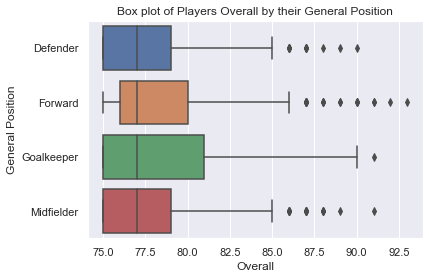

In [9]:
ax = sns.boxplot(x="Overall", y="GeneralPosition",data=df,order=overallByGeneralPosition['GeneralPosition'])
ax.set(xlabel='Overall', ylabel='General Position', title = 'Box plot of Players Overall by their General Position')

[Text(0.5, 0, 'Overall'),
 Text(0, 0.5, 'Best Position'),
 Text(0.5, 1.0, 'Box plot of Players Overall by their Best Position')]

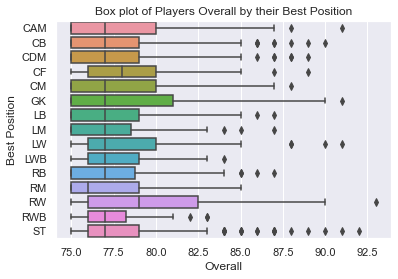

In [10]:
ax = sns.boxplot(x="Overall", y="BestPosition",data=df,order=overallByBestPosition['BestPosition'])
ax.set(xlabel='Overall', ylabel='Best Position', title = 'Box plot of Players Overall by their Best Position')

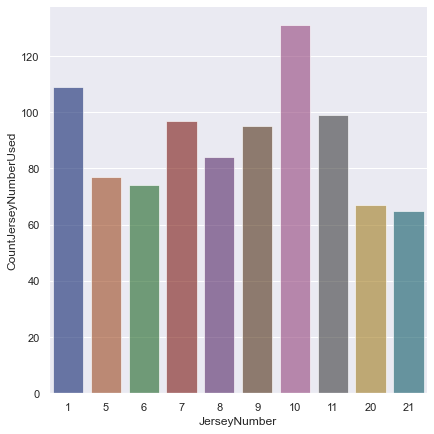

In [11]:
ax = sns.catplot(data=Top10JerseysUsed, kind="bar", x="JerseyNumber", y="CountJerseyNumberUsed",ci="sd", palette="dark", alpha=.6, height=6)


# Initial Thoughts 

The most intersting factor of this dataset is that for each position the mean overall is really close to each other. Clearly it seems there is no bias to a certain position, which many people who play fifa think otherwise.

The next step where this analysis is gois if definetly checking overall for positions and how they correlate to their stats. Also maybe fun things as Jersey Number by Nationality or things to do with weight and height. Mainly check variables that do not count for in-game production


# Observations:
- The average age is 27
- Spain, Brazil and France have respectively the highest amount of active players
- The average overall (77) is really close to the min value which is 75
- Most Jersey Numbers fall in between 7 and 22
- Most football players are really lightweight 154lbs
- Most players in a specific position are Centre-Backs
- Most players in a general position are midfielders
- The average height is quite tall standing at 181 cm
- The mean for penalties shot is 56, which is quite low
- Number 10 is the favorite jersey for top players while 21 is the least favorite
- GK and RW have the highest ceiling without counting outliers.
- GK have higher percentage of high rated players compared to defenders, midfielders and forwards.


# Task 5. Conduct your analysis to help answer your research question(s)

## Research questions 

1. How does the average highest stat for ST compares against all players ST average highest stat by best position?

2. Is there a general decline in stamina for older players?

3. Does higher weight always mean higher strength on average for each general position?

## Research question #1

To first answer this first question we must drop all variable that do not involve calculations for this question. Then we must isolate the ST position and find its highest average stat.


In [12]:
dfr1 = df
dfr1 = dfr1.drop(dfr1.columns[0:10], axis = 1) 
dfr1 = dfr1.drop(dfr1.columns[36], axis = 1) 
dfr1 = dfr1.drop(dfr1.columns[35], axis = 1)
dfr1GroupSt = dfr1
dfr1GroupSt = dfr1GroupSt[dfr1GroupSt["BestPosition"].str.contains('ST')]
dfr1GroupSt = dfr1GroupSt.groupby('BestPosition').mean()
dfr1GroupSt['Max'] = dfr1GroupSt.idxmax(axis=1)
dfr1GroupSt['Max'] 


BestPosition
ST    Positioning
Name: Max, dtype: object

After dicovering that positioning is the highest average stat for ST, we can find the mean of that stat for all position and assign a df, so the graph is sorted by the positioning stat

In [13]:
orderGraph = dfr1.groupby('BestPosition')['Positioning'].mean().reset_index()
orderGraph=orderGraph.sort_values('Positioning', ascending=False)
orderGraph=orderGraph.reset_index(drop= True)

After we have the ordering by the average we can start doing data vizualizations. For this research question we will do a boxplot, a violin plot and a stripplot. These are the best plots to analyze a value by each type the data has. It will help us understand the quantity of data, the statistical summary of the data, and where are the player generally located.

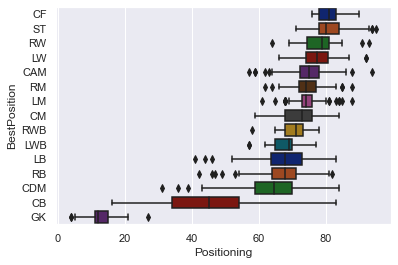

In [14]:
ax = sns.boxplot(
    data=dfr1,
    x="Positioning", y="BestPosition", palette="dark", order=orderGraph['BestPosition'])


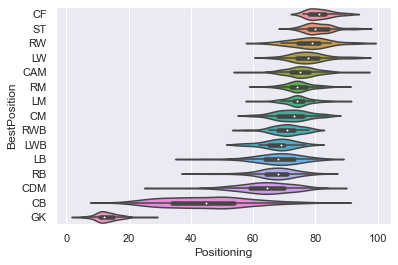

In [15]:
ax = sns.violinplot(x="Positioning", y="BestPosition",data=dfr1, scale="width", order=orderGraph['BestPosition'])


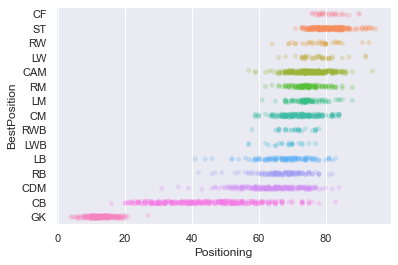

In [16]:
ax = sns.stripplot(x="Positioning", y="BestPosition", 
              data=dfr1, dodge=True, alpha=.25, zorder=1,order=orderGraph['BestPosition'] )

To first answer this second question we must groupby Age based on the average stamina. Then we can output the result to show a general idea of how the data looks like.



In [17]:
dfr2 = df
dfr2 = dfr2.groupby('Age')['Stamina'].mean().reset_index()
dfr2


,Age,Stamina
0,17,71.500000
1,18,71.333333
2,19,77.545455
3,20,71.872340
4,21,73.019608
5,22,72.793814
6,23,73.507812
7,24,73.605096
8,25,73.490323
9,26,73.508475


After we have the data grouped by the average we can start doing data vizualizations. For this research question we will do a lineplot, a regression plot and a jointplot. These are the best plots to analyze the trend of two values. It will help us understand the overall movement of the data with its ranges, the trend of the data, and where is the most concentration of players comparing these two data values.

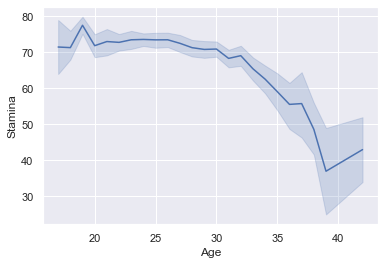

In [18]:
ax = sns.lineplot(x="Age", y="Stamina",
              data=df)

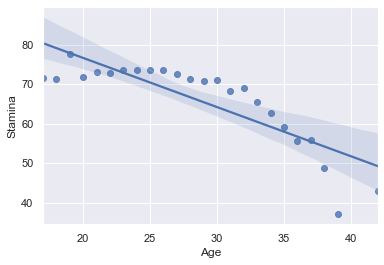

In [19]:
ax = sns.regplot(x="Age", y="Stamina",
              data=dfr2)

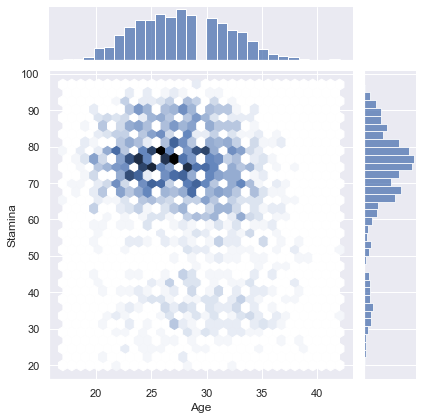

In [20]:
ax = sns.jointplot(x="Age", y="Stamina",
              data=df, kind = "hex")

In [21]:
dfr3 = df
dfr3['Weight'] = dfr3['Weight'].str.strip("lbs")
dfr3['Weight'] = dfr3['Weight'].apply(pd.to_numeric)
dfr3 = dfr3.groupby(['Weight','GeneralPosition'])['Strength'].mean().reset_index()
dfr3 = dfr3.sort_values('Strength', ascending=False).reset_index(drop=True)
dfr3


,Weight,GeneralPosition,Strength
0,205,Defender,93.000000
1,214,Defender,92.666667
2,205,Forward,91.666667
3,203,Defender,91.250000
4,196,Midfielder,91.000000
...,...,...,...
138,132,Defender,39.000000
139,128,Midfielder,38.600000
140,134,Forward,35.000000
141,130,Midfielder,35.000000


After we have the data grouped by the average Strength we can start doing data vizualizations. For this research question we will do a lineplot and regressions plot. These are the best plots to analyze the trend of two values factored by an external value. It will help us understand the overall movement of the data with its ranges by each positio and the trend of the data by each position.

0       159
1       183
2       176
3       150
4       192
       ... 
2058    165
2059    159
2060    161
2061    150
2062    203
Name: Weight, Length: 2063, dtype: int64

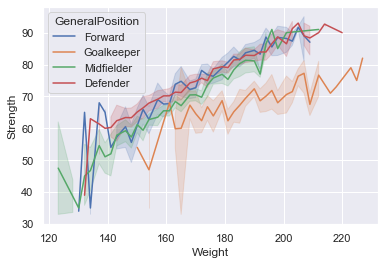

In [22]:
ax = sns.lineplot(x="Weight", y="Strength", hue = 'GeneralPosition',
              data=df)
df['Weight']

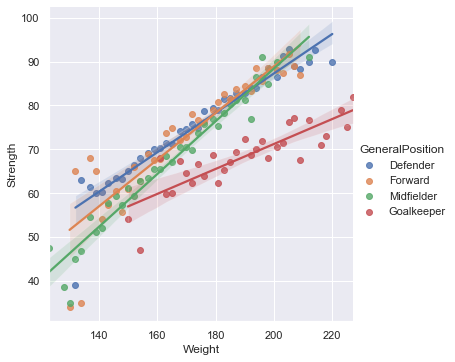

In [23]:
ax = sns.lmplot(x="Weight", y="Strength",hue = 'GeneralPosition',
              data=dfr3)

## Summary and conclusions

- Research Question 1: How does the average highest stat for ST compares against all players ST average highest stat by best position?

    By looking at data we can conclude that on average the only position that has better positioning(ST highest average stat) is the CF. However, ST still have a higher ceiling than any other position. Still, ST have a lower floor than the CF. Another intersting conclusion is that all positions have at least one or more players with better positioning than a ST, except for goalkeepers. The last fun fact to note is that CB floor and ceiling are so widespread that a defender could be actually almost as good as a ST or really bad.
    
    <br/>

- Research Question 2: Is there a general decline in stamina for older players?

     By looking at the data there is definetly a general decline in stamina for older players. They way stamina drops is slowly at first and then decreasing dramatically after 30. From 17-26 it looks like it maintains a constant stamina, however it is important to notice it does not look like this because the average for 19 years old is higher, however it seems it is an outlier in the overall trend. Another thing to note is that it seems stamina increases after 40, but this again might just be an outlier. Given the fact there is not that much player playing at that age, the ones who stay are fitter therfore it seems stamina increases, while it actually it doesn't. 
    
    <br/>

- Research Question 3: Does higher weight always mean higher strength on average for each general position?

    By looking at the data we can conclude that indeed higher weight relates to higher strength, however it can be noted this make a more significant rise for Forwards, Midfielders and Defenders, while in Goalkeeper is it is less impafctful, however there is a clear trend. Forwards, Midfielders and Defenders share almost exactly the same trend, the position does not make any difference when analyzing this factor. 
    
    <br/>

